In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import os
os.chdir(r"C:\Users\teach\Desktop\Qualcomm content\Time_Series\Module 5")

In [7]:
# 1. Load the dataset
data = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date')

In [8]:

# Ensure the dataset is sorted by date (important for time series)
data = data.sort_index()

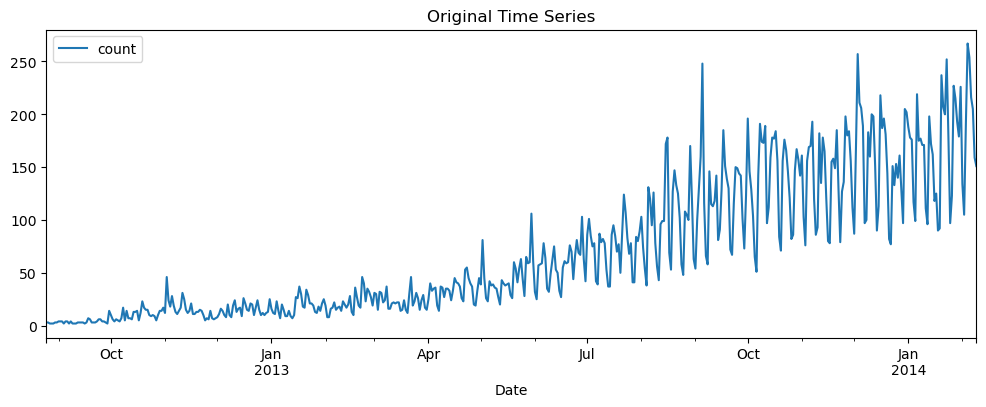

In [12]:
# Visualize the data
plt.figure(figsize=(12, 4))
data['count'].plot(title="Original Time Series", legend=True)
plt.show()

In [13]:
# 2. Simple Exponential Smoothing (SES)
model_ses = SimpleExpSmoothing(data['count']).fit(smoothing_level=0.5, optimized=False)



C:\Users\teach\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
data['SES'] = model_ses.fittedvalues

In [15]:
data

,count,SES
Date,,
2012-08-25,3,3.000000
2012-08-26,3,3.000000
2012-08-27,2,3.000000
2012-08-28,2,2.500000
2012-08-29,2,2.250000
...,...,...
2014-02-05,254,215.665783
2014-02-06,216,234.832891
2014-02-07,205,225.416446


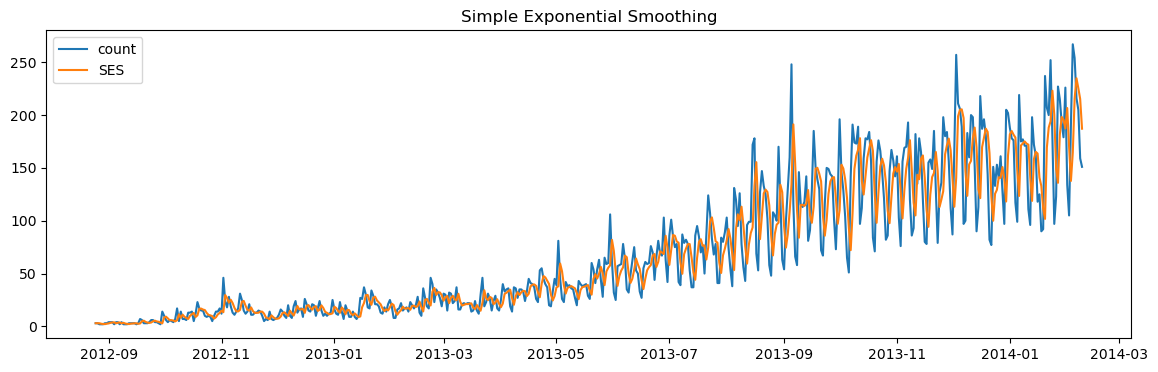

In [28]:
# Visualize SES
plt.figure(figsize=(14, 4))
plt.plot(data["count"],label="count")
plt.plot(data["SES"],label="SES")
plt.title("Simple Exponential Smoothing")
plt.legend(loc='best')
plt.show()

<Figure size 2000x600 with 0 Axes>

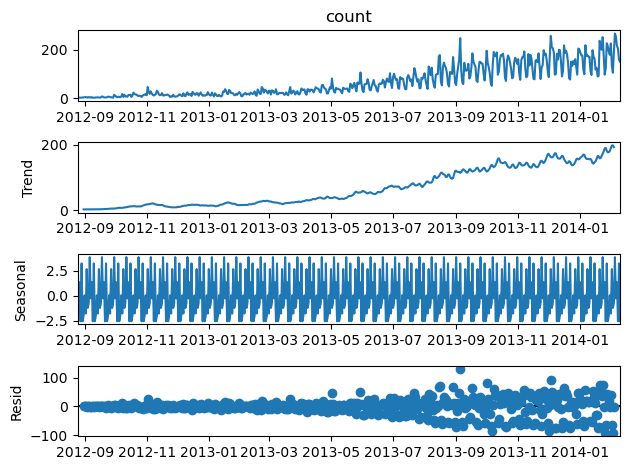

In [33]:
# 3. Decomposing Time Series (Additive Model)
decomposition = seasonal_decompose(data['count'], model='additive', period=12)  # Change period as needed

# Plot decomposition results
plt.figure(figsize=(20, 6))
decomposition.plot()
plt.show()

In [34]:

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [37]:
residual

Date
2012-08-25   NaN
2012-08-26   NaN
2012-08-27   NaN
2012-08-28   NaN
2012-08-29   NaN
              ..
2014-02-05   NaN
2014-02-06   NaN
2014-02-07   NaN
2014-02-08   NaN
2014-02-09   NaN
Name: resid, Length: 534, dtype: float64

In [ ]:


# 4. Additive vs Multiplicative
# Additive model assumes: value = trend + seasonality + residuals
# Multiplicative model assumes: value = trend * seasonality * residuals

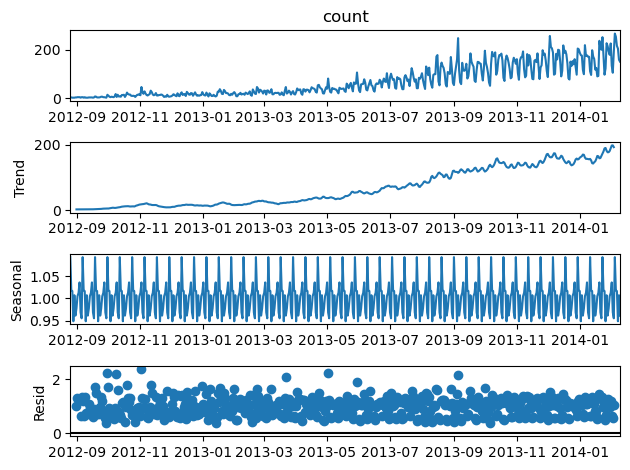

In [38]:

decomposition_mult = seasonal_decompose(data['count'], model='multiplicative', period=12)
decomposition_mult.plot()
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [44]:
# 5. Build ARIMA Model
# Determine ARIMA order (p, d, q) - Example assumes (1, 1, 1)
model_arima = ARIMA(data['count'], order=(1, 1, 1))
results_arima = model_arima.fit()
data['ARIMA_Fitted'] = results_arima.fittedvalues

In [45]:
# Forecast for next 10 steps
forecast_steps = 10
forecast_arima = results_arima.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast_arima}, index=forecast_index)

<Figure size 640x480 with 0 Axes>

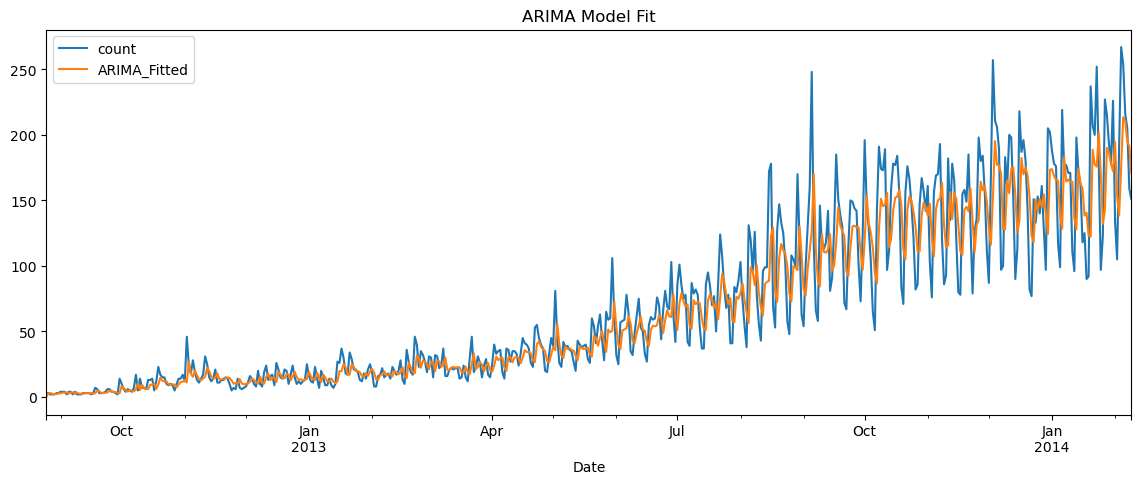

In [47]:

# Visualize ARIMA Fitted vs Actual

data[['count', 'ARIMA_Fitted']].plot(title="ARIMA Model Fit", legend=True,figsize=(14, 5))
plt.show()

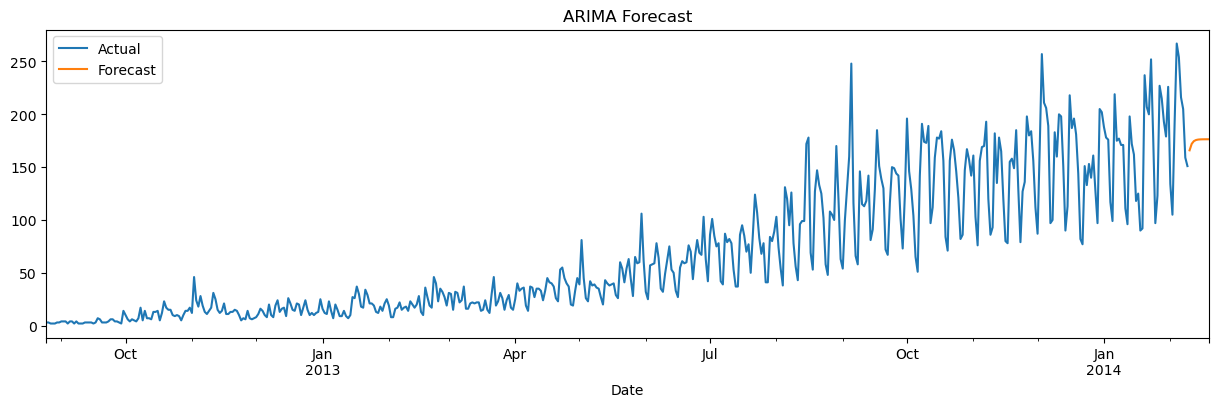

In [49]:
# Visualize Forecast
plt.figure(figsize=(15, 4))
data['count'].plot(label="Actual", legend=True)
forecast_df['Forecast'].plot(label="Forecast", legend=True)
plt.title("ARIMA Forecast")
plt.show()